## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
#
# Your code to import matplotlib, pandas and numpy libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Your code to print shapes of training and test data. Check how the data looks
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Your code to print the shape of one image.
x_train[1].shape

(32, 32, 3)

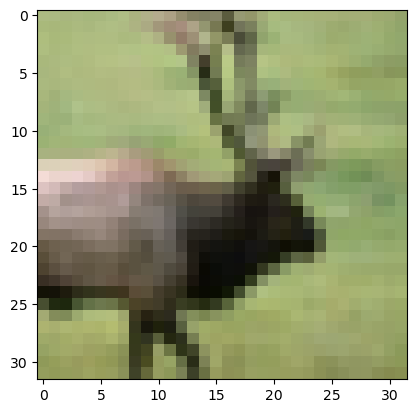

In [5]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[34])
plt.show()

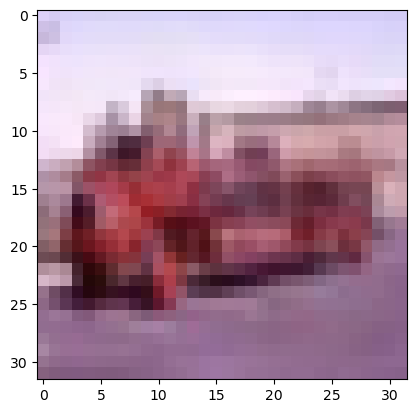

In [6]:
# Show any other image
plt.imshow(x_train[67])
plt.show()

# PreProcessing

In [7]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [8]:
# Your code to print shape of any image i.e particular value in the x_train
print(x_train[3].shape)

(32, 32, 3)


In [9]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(x_train.max())

255


In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# Print the shape of x_train again.
x_train.shape

(50000, 32, 32, 3)

In [12]:
# Print the shape of y_train again.
y_train.shape

(50000, 1)

# One hot vector encoding.
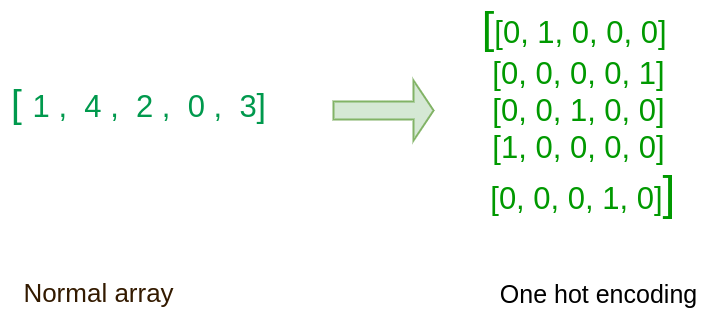


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [13]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
y_train.shape[0]
# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train,10)
print("Categorical representation of y_train:")
print(y_cat_train)

Categorical representation of y_train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
# Your code to print shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [15]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_cat_train[5])
print(y_train[5])
# Compare the result for better understanding of "to_categorical()"

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]


In [16]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test)
print("Categorical representation of y_test:")
print(y_cat_test)
# Print the shapes to look how y_cat_test looks.
y_cat_test.shape

Categorical representation of y_test:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


(10000, 10)

----------
# Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [18]:
model = Sequential()


model.add(Conv2D(filters=32, strides=(2,2), kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
model.add(Conv2D(filters=22, kernel_size=(5,5),input_shape=(32, 32, 3), activation='sigmoid',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

#
# Add few dense layers. 
#
model.add(Dense(128,activation='relu', input_shape=(22, 22, 4)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 22)          17622     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 22)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 22)                0         
                                                                 
 dense (Dense)               (None, 128)               2

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
model.fit(x_train, y_cat_train, epochs=10, batch_size=32, validation_data=(x_test, y_cat_test), callbacks = [early_stop])


Epoch 1/10


1563/1563 [==============================] - 6s 3ms/step - loss: 1.7699 - accuracy: 0.3286 - val_loss: 1.5166 - val_accuracy: 0.4358
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4571 - accuracy: 0.4621 - val_loss: 1.4138 - val_accuracy: 0.4806
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3572 - accuracy: 0.5048 - val_loss: 1.3654 - val_accuracy: 0.5035
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2891 - accuracy: 0.5318 - val_loss: 1.2850 - val_accuracy: 0.5320
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2414 - accuracy: 0.5508 - val_loss: 1.2623 - val_accuracy: 0.5468
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1984 - accuracy: 0.5690 - val_loss: 1.2565 - val_accuracy: 0.5532
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1621 - accuracy: 0.5828 - val_loss: 1.2541 - val_accurac

### We can save the model in a file. Following code shows how to do this.

In [23]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
# Print first few rows of losses.
history = model.fit(x_train, y_cat_train, epochs=5, batch_size=32, validation_data=(x_test, y_cat_test))
training_parameters = history.history
print("First few rows of losses:")
print(history.history['loss'][:5])

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0574 - accuracy: 0.6238 - val_loss: 1.1833 - val_accuracy: 0.5823
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0445 - accuracy: 0.6293 - val_loss: 1.1840 - val_accuracy: 0.5848
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0285 - accuracy: 0.6358 - val_loss: 1.1589 - val_accuracy: 0.5966
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0104 - accuracy: 0.6399 - val_loss: 1.1536 - val_accuracy: 0.5958
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9963 - accuracy: 0.6464 - val_loss: 1.1564 - val_accuracy: 0.5995
First few rows of losses:
[1.0574415922164917, 1.0444815158843994, 1.0284936428070068, 1.0103520154953003, 0.9963358044624329]


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





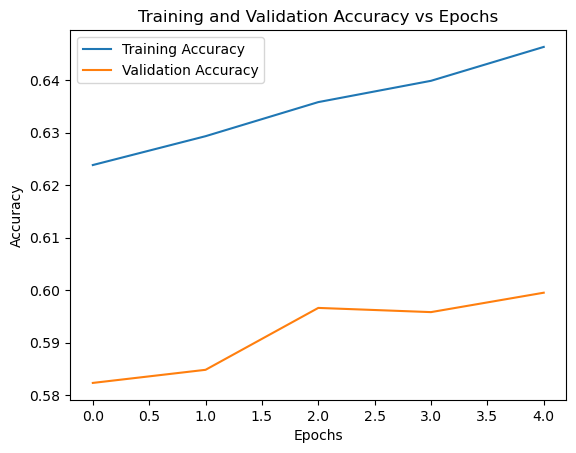

In [33]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

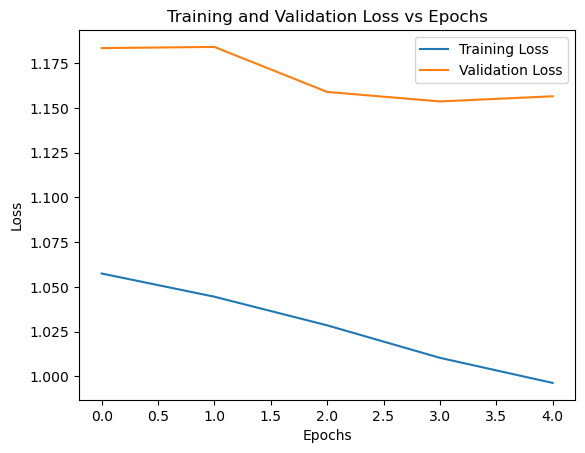

In [34]:
# 
# Your code to plot loss and val_loss vs the epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [35]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [36]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.1564197540283203, 0.5995000004768372]

### Make a prediction on test data set.   

In [37]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 2ms/step


### We could get the full classification report. 

In [38]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [39]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.72      0.52      0.60      1000\n           1       0.69      0.77      0.72      1000\n           2       0.51      0.42      0.46      1000\n           3       0.45      0.44      0.44      1000\n           4       0.57      0.45      0.50      1000\n           5       0.50      0.55      0.52      1000\n           6       0.73      0.65      0.69      1000\n           7       0.64      0.67      0.65      1000\n           8       0.61      0.80      0.69      1000\n           9       0.61      0.73      0.66      1000\n\n    accuracy                           0.60     10000\n   macro avg       0.60      0.60      0.60     10000\nweighted avg       0.60      0.60      0.60     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [41]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,predictions)

array([[519,  57,  60,  14,  21,   9,   8,   8, 231,  73],
       [ 10, 768,   4,  15,   2,   5,  11,   7,  48, 130],
       [ 54,  21, 422,  83, 102, 124,  62,  52,  43,  37],
       [ 17,  26,  56, 439,  60, 202,  61,  59,  35,  45],
       [ 15,  14, 124,  91, 446,  57,  69, 121,  37,  26],
       [ 10,  15,  67, 171,  36, 553,  12,  77,  33,  26],
       [  7,  18,  50,  94,  64,  45, 653,  19,  16,  34],
       [ 16,  20,  25,  53,  45,  96,  12, 667,  17,  49],
       [ 44,  58,   4,  12,   9,   7,   4,  10, 796,  56],
       [ 26, 124,  10,  13,   3,  10,   5,  19,  58, 732]], dtype=int64)

<Axes: >

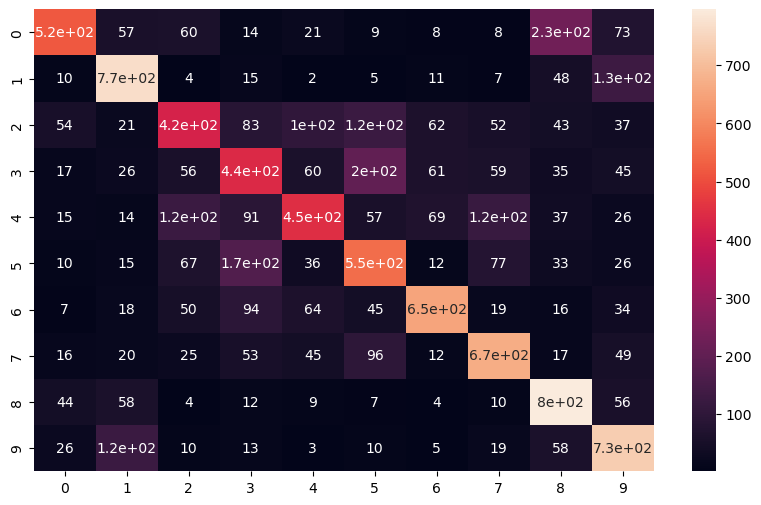

In [43]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [44]:
my_image = x_test[16]

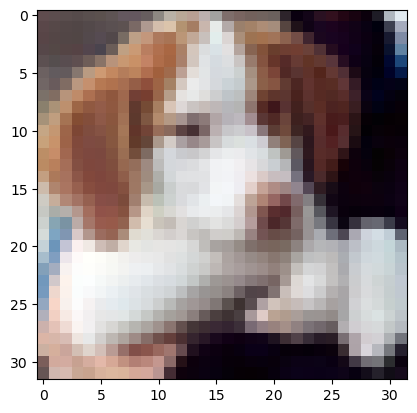

In [45]:
plt.imshow(my_image)

In [46]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 26ms/step


array([[0.00176744, 0.00117206, 0.0409389 , 0.0939938 , 0.00118425,
        0.7515389 , 0.00257085, 0.10395858, 0.00107762, 0.00179762]],
      dtype=float32)

In [ ]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

In [ ]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [ ]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 